<a href="https://colab.research.google.com/github/AnaCampos8898998/Machine_Learning/blob/Proyectos/Menigioma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
INGENIERÍA EN TELECOMUNICACIONES

---
MACHINE LEARNING WORKFLOW

---
PROF.: DORA MARIA BALLESTEROS

---

Imagenes de meningioma

---

Ana María Campos Mora




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
plt.style.use("ggplot")
%matplotlib inline

In [ ]:
from tqdm import tqdm_notebook, tnrange
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from tensorflow.keras.layers import Lambda, RepeatVector, Reshape
from tensorflow.keras.layers import Conv2D, Conv2DTranspose
from tensorflow.keras.layers import MaxPooling2D, GlobalMaxPool2D
from tensorflow.keras.layers import concatenate, add
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# **Primera Fase**

In [ ]:
# ajustar parámetros de la imagen
im_width = 128
im_height = 128
border = 5

**Ruido sal y pimienta url : https://colab.research.google.com/drive/1D_dg1SSmX1WvJO2zWY_-dVnr6fnC8eMN?usp=sharing**

In [ ]:
# descomprimir la carpeta noisy (imágenes de entrada al autoencoder)
!unzip -qq "/content/drive/MyDrive/ML_Workflow/Dataset_ML/Meningioma_Noisy.zip"

In [ ]:
ids = next(os.walk("/content/Meningioma_Noisy"))[2] # nombres de todas las imagenes de la carpeta images
print("No. of images = ", len(ids))  # cantidad de imagenes en la carpeta

No. of images =  204


In [ ]:
ids

['M_170.jpg',
 'M_150.jpg',
 'M_44.jpg',
 'M_171.jpg',
 'M_110.jpg',
 'M_173.jpg',
 'M_60.jpg',
 'M_26.jpg',
 'M_37.jpg',
 'M_7.jpg',
 'M_101.jpg',
 'M_29.jpg',
 'M_111.jpg',
 'M_41.jpg',
 'M_193.jpg',
 'M_53.jpg',
 'M_152.jpg',
 'M_17.jpg',
 'M_91.jpg',
 'M_77.jpg',
 'M_154.jpg',
 'M_174.jpg',
 'M_33.jpg',
 'M_27.jpg',
 'M_167.jpg',
 'M_71.jpg',
 'M_62.jpg',
 'M_80.jpg',
 'M_6.jpg',
 'M_56.jpg',
 'M_127.jpg',
 'M_58.jpg',
 'M_128.jpg',
 'M_2.jpg',
 'M_30.jpg',
 'M_11.jpg',
 'M_79.jpg',
 'M_187.jpg',
 'M_182.jpg',
 'M_140.jpg',
 'M_40.jpg',
 'M_78.jpg',
 'M_13.jpg',
 'M_15.jpg',
 'M_42.jpg',
 'M_103.jpg',
 'M_198.jpg',
 'M_199.jpg',
 'M_149.jpg',
 'M_172.jpg',
 'M_139.jpg',
 'M_137.jpg',
 'M_129.jpg',
 'M_185.jpg',
 'M_126.jpg',
 'M_5.jpg',
 'M_204.jpg',
 'M_4.jpg',
 'M_159.jpg',
 'M_87.jpg',
 'M_95.jpg',
 'M_163.jpg',
 'M_133.jpg',
 'M_116.jpg',
 'M_169.jpg',
 'M_151.jpg',
 'M_123.jpg',
 'M_45.jpg',
 'M_132.jpg',
 'M_92.jpg',
 'M_48.jpg',
 'M_180.jpg',
 'M_34.jpg',
 'M_115.jpg',
 'M_1

In [ ]:
# descomprimir la carpeta clean (imágenes de salida del autoencoder)
!unzip -qq "/content/drive/MyDrive/ML_Workflow/Dataset_ML/Meningioma.zip"

In [ ]:
idx = next(os.walk("/content/Meningioma"))[2]

idx

['M_170.jpg',
 'M_150.jpg',
 'M_44.jpg',
 'M_171.jpg',
 'M_110.jpg',
 'M_173.jpg',
 'M_60.jpg',
 'M_26.jpg',
 'M_37.jpg',
 'M_7.jpg',
 'M_101.jpg',
 'M_29.jpg',
 'M_111.jpg',
 'M_41.jpg',
 'M_193.jpg',
 'M_53.jpg',
 'M_152.jpg',
 'M_17.jpg',
 'M_91.jpg',
 'M_77.jpg',
 'M_154.jpg',
 'M_174.jpg',
 'M_33.jpg',
 'M_27.jpg',
 'M_167.jpg',
 'M_71.jpg',
 'M_62.jpg',
 'M_80.jpg',
 'M_6.jpg',
 'M_56.jpg',
 'M_127.jpg',
 'M_58.jpg',
 'M_128.jpg',
 'M_2.jpg',
 'M_30.jpg',
 'M_11.jpg',
 'M_79.jpg',
 'M_187.jpg',
 'M_182.jpg',
 'M_140.jpg',
 'M_40.jpg',
 'M_78.jpg',
 'M_13.jpg',
 'M_15.jpg',
 'M_42.jpg',
 'M_103.jpg',
 'M_198.jpg',
 'M_199.jpg',
 'M_149.jpg',
 'M_172.jpg',
 'M_139.jpg',
 'M_137.jpg',
 'M_129.jpg',
 'M_185.jpg',
 'M_126.jpg',
 'M_5.jpg',
 'M_204.jpg',
 'M_4.jpg',
 'M_159.jpg',
 'M_87.jpg',
 'M_95.jpg',
 'M_163.jpg',
 'M_133.jpg',
 'M_116.jpg',
 'M_169.jpg',
 'M_151.jpg',
 'M_123.jpg',
 'M_45.jpg',
 'M_132.jpg',
 'M_92.jpg',
 'M_48.jpg',
 'M_180.jpg',
 'M_34.jpg',
 'M_115.jpg',
 'M_1

In [ ]:
print("No. of images = ", len(idx))

No. of images =  204


In [ ]:
# se crea un tensor de 4 dimensiones para X: cantidad de imagenes, filas, columnas, cantidad de canales (1 para imagen escala grises)
y = np.zeros((len(ids), im_height, im_width, 1), dtype=np.float32)
y.shape

(204, 128, 128, 1)

In [ ]:
# se crea un tensor de 4 dimensiones para y: cantidad de imagenes, filas, columnas, cantidad de canales (1 para imagen escala grises)
x = np.zeros((len(idx), im_height, im_width, 1), dtype=np.float32)
x.shape

(204, 128, 128, 1)

In [ ]:
# tqdm se utiliza para mostrar la barra de progreso
# se leen todas las imagenes del listado contenido en ids
# Los nombres en la carpeta "noisy" deben ser los mismos de la carpeta "clean"
for n, id_ in tqdm_notebook(enumerate(ids), total=len(ids)):
    # se cargan las imagenes y se convierten a arreglo de datos
    img_y = img_to_array(load_img("/content/Meningioma/"+id_, grayscale=True))
    img_x = img_to_array(load_img("/content/Meningioma_Noisy/"+id_, grayscale=True))
    # se redimensionan las imagenes
    y_img = resize(img_y, (128, 128, 1), mode = 'constant', preserve_range = True)
    x_img = resize(img_x, (128, 128, 1), mode = 'constant', preserve_range = True)

    y[n] = y_img/255.0
    x[n] = x_img/255.0

<ipython-input-14-ed4bc4b680b6>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n, id_ in tqdm_notebook(enumerate(ids), total=len(ids)):


  0%|          | 0/204 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [ ]:
x[1].shape

(128, 128, 1)

In [ ]:
y[1].shape

(128, 128, 1)

In [ ]:
y.shape

(204, 128, 128, 1)

In [ ]:
# se separa en entrenamiento y validacion, tanto la entrada (imagen ruidosa), como la salida (imagen limpia)
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

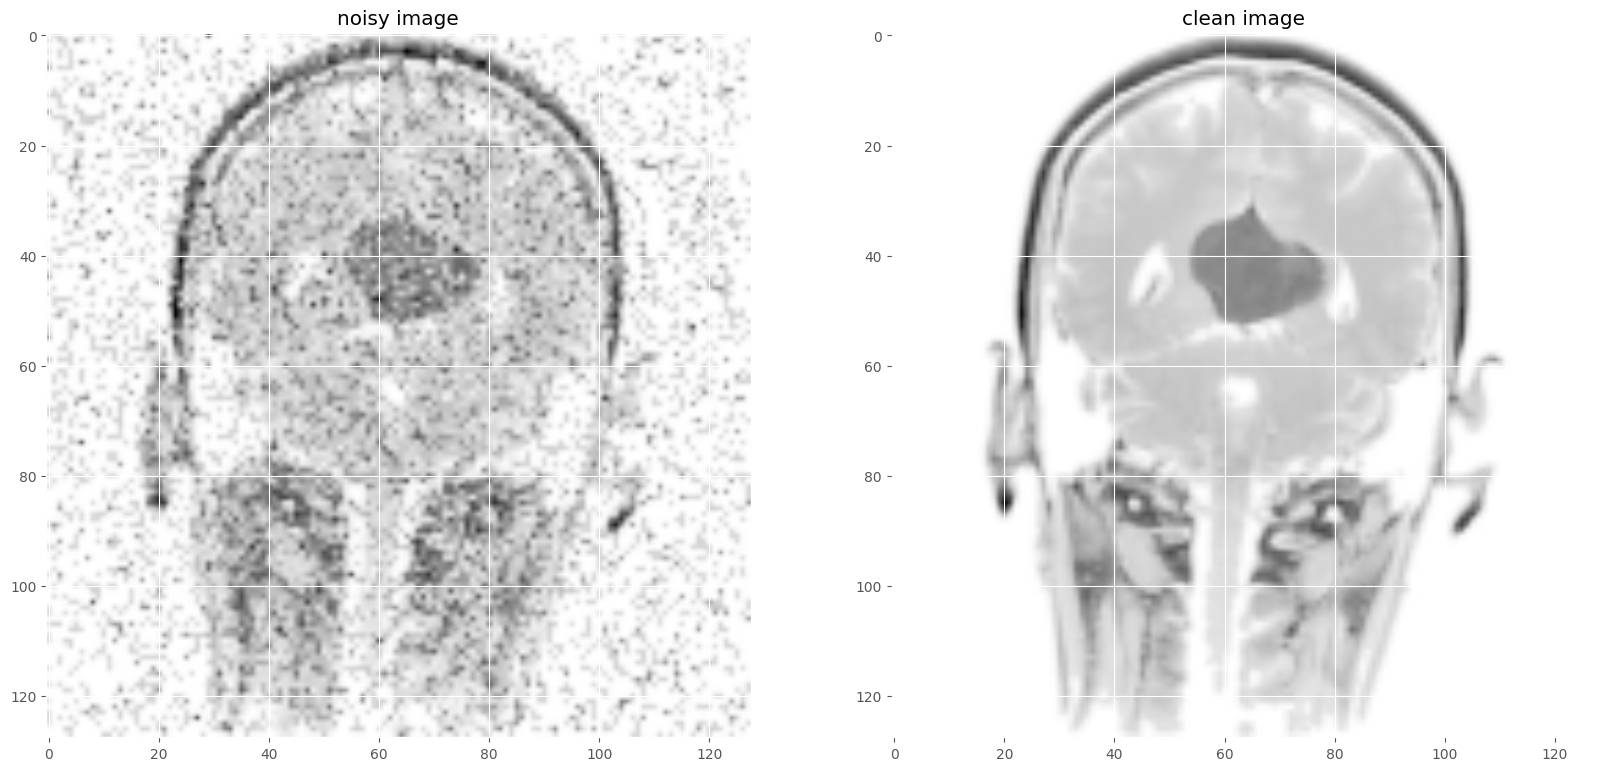

In [ ]:
# Se visualiza una imagen seleccionada al azar y su correspondiente imagen con ruido
ix = random.randint(0, len(X_train)) # se genera un numero aleatorio entre 0 y la cantidad de imagenes
# se define un subplot de dos figuras
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 15))

ax1.imshow(X_train[ix, ..., 0], cmap = 'Greys', interpolation = 'bilinear')
ax1.set_title('noisy image')

ax2.imshow(y_train[ix, ..., 0], cmap = 'Greys', interpolation = 'bilinear')
ax2.set_title('clean image')

plt.show()

# **Segunda Fase :Entrenamiento**

In [ ]:
# Se define la funcion conv2d_block correspondiente a dos bloques convolucionales
def conv2d_block(input_tensor, n_filters, kernel_size = 3, batchnorm = True):
    """Function to add 2 convolutional layers with the parameters passed to it"""
    # first layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # second layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)

    return x

In [ ]:
# Se define la funcion get_unet correspondiente a la arquitectura U-NET
def get_unet(input_img, n_filters = 16, dropout = 0.1, batchnorm = True):
    """Function to define the UNET Model"""
    # Convolutional network
    c1 = conv2d_block(input_img, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(dropout)(p1)

    c2 = conv2d_block(p1, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(dropout)(p2)

    c3 = conv2d_block(p2, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(dropout)(p3)

    c4 = conv2d_block(p3, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(dropout)(p4)

    c5 = conv2d_block(p4, n_filters = n_filters * 16, kernel_size = 3, batchnorm = batchnorm)

    # Up-convolutional network
    u6 = Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)

    u7 = Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)

    u8 = Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)

    u9 = Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = concatenate([u9, c1])
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
    model = Model(inputs=[input_img], outputs=[outputs])
    return model

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/metrics
input_img = Input((im_height, im_width, 1), name='G_')
model = get_unet(input_img, n_filters=16, dropout=0.25, batchnorm=True)
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["AUC"])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath="weights-improvement-{epoch:02d}-{val_auc:.2f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_auc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
# entrenamiento del autoencoder U-NET
history = model.fit(
    X_train,
    y_train,
    steps_per_epoch=50,
    epochs=100,
    validation_data=(X_valid, y_valid),
    validation_steps=5,
    callbacks=callbacks_list
)

Epoch 1/100
50/50 [==============================] - ETA: 0s - loss: 0.4548 - auc: 0.9207
Epoch 1: val_auc improved from -inf to 0.94868, saving model to weights-improvement-01-0.95.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


50/50 [==============================] - 23s 78ms/step - loss: 0.4548 - auc: 0.9207 - val_loss: 1.0438 - val_auc: 0.9487
Epoch 2/100
48/50 [===========================>..] - ETA: 0s - loss: 0.3971 - auc: 0.9440
Epoch 2: val_auc did not improve from 0.94868
50/50 [==============================] - 1s 20ms/step - loss: 0.3959 - auc: 0.9437 - val_loss: 0.6732 - val_auc: 0.9107
Epoch 3/100
47/50 [===========================>..] - ETA: 0s - loss: 0.3880 - auc: 0.9496
Epoch 3: val_auc did not improve from 0.94868
50/50 [==============================] - 1s 17ms/step - loss: 0.3869 - auc: 0.9491 - val_loss: 0.4823 - val_auc: 0.9385
Epoch 4/100
49/50 [============================>.] - ETA: 0s - loss: 0.3823 - auc: 0.9510
Epoch 4: val_auc did not improve from 0.94868
50/50 [==============================] - 1s 15ms/step - loss: 0.3816 - auc: 0.9512 - val_loss: 0.4473 - val_auc: 0.9368
Epoch 5/100
49/50 [============================>.] - ETA: 0s - loss: 0.3838 - auc: 0.9561
Epoch 5: val_auc impr


Epoch 83: val_auc did not improve from 0.96927
50/50 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - auc: 0.0000e+00 - val_loss: 0.3803 - val_auc: 0.9568


In [ ]:
# no activar esta celda, a menos que en el entorno de ejecución no aparezcan los archivos *.h5
#model.save('/content/model.h5')
#model.save_weights('/content/weights.h5')

In [ ]:
# accuracy de validación obtenida
np.max(history.history["val_auc"])

0.9692736864089966

# **Tercera Fase**

In [ ]:
# se carga el modelo
model =  '/content/weights-improvement-08-0.97.h5'
model = load_model(model)

In [ ]:
# Evaluación del modelo. Los resultados son loss y accuracy (validación)
model.evaluate(X_valid, y_valid, verbose=1)

2/2 [==============================] - 1s 22ms/step - loss: 0.3841 - auc: 0.9693


[0.38405030965805054, 0.9692736864089966]

In [ ]:
# Se almacena en preds_train y preds_valid los resultados de predicción, tanto de entrenamiento, como de validación
preds_train = model.predict(X_train, verbose=1)
preds_valid = model.predict(X_valid, verbose=1)

2/2 [==============================] - 0s 14ms/step


Text(0.5, 1.0, 'clean image (ground truth)')

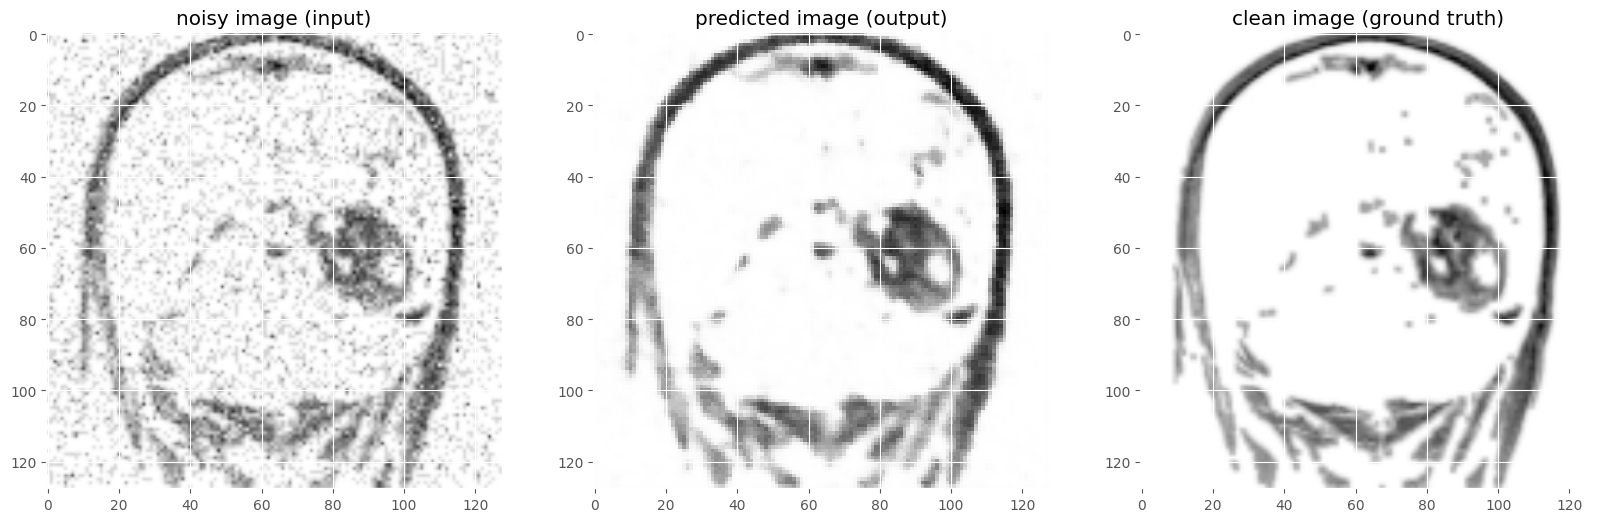

In [ ]:
# Se visualiza una imagen seleccionada al azar y su correspondiente imagen con ruido
ix = random.randint(0, len(X_valid)) # se genera un numero aleatorio entre 0 y la cantidad de imagenes
#ix = 26 # si se desea una imagen específica del dataset
# se define un subplot de dos figuras
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 15))

ax1.imshow(X_valid[ix, ..., 0], cmap = 'Greys', interpolation = 'bilinear')
ax1.set_title('noisy image (input)')

ax2.imshow(preds_valid[ix, ..., 0], cmap = 'Greys')
ax2.set_title('predicted image (output)')

ax3.imshow(y_valid[ix, ..., 0], cmap = 'Greys', interpolation = 'bilinear')
ax3.set_title('clean image (ground truth)')

In [ ]:
ssim_13 = ssim(X_valid[ix, ..., 0], y_valid[ix, ..., 0])
ssim_23 = ssim(preds_valid[ix, ..., 0], y_valid[ix, ..., 0])

# Imprimir resultados
print(f"SSIM entre Noisy y Clean: {ssim_13}")
print(f"SSIM entre Predicted y Clean: {ssim_23}")

SSIM entre Noisy y Clean: 0.4046768898211035
SSIM entre Predicted y Clean: 0.8784627836418869


# **Cuarta Fase**

In [ ]:
# Calcular SSIM
ssim_clean_noisy = []
ssim_clean_pred = []

for i in range(len(X_valid)):
  ssim_cn = ssim(y_valid[i], X_valid[i], multichannel=True)
  ssim_clean_noisy.append(ssim_cn)
  print(f"SSIM entre Noisy y Clean: {ssim_cn}")

  ssim_cp = ssim(y_valid[i], preds_valid[i], multichannel=True)
  ssim_clean_pred.append(ssim_cp)
  print(f"SSIM entre Predicted y Clean: {ssim_cp}")

SSIM entre Noisy y Clean: 0.4113990366458893
SSIM entre Predicted y Clean: 0.8435869216918945
SSIM entre Noisy y Clean: 0.5165801048278809
SSIM entre Predicted y Clean: 0.8349984288215637
SSIM entre Noisy y Clean: 0.4348166286945343
SSIM entre Predicted y Clean: 0.8478508591651917
SSIM entre Noisy y Clean: 0.49876338243484497
SSIM entre Predicted y Clean: 0.8554366230964661
SSIM entre Noisy y Clean: 0.43694981932640076
SSIM entre Predicted y Clean: 0.8704174757003784
SSIM entre Noisy y Clean: 0.4876006245613098
SSIM entre Predicted y Clean: 0.8478291034698486
SSIM entre Noisy y Clean: 0.5705122947692871
SSIM entre Predicted y Clean: 0.8321620225906372
SSIM entre Noisy y Clean: 0.39017003774642944
SSIM entre Predicted y Clean: 0.8581602573394775
SSIM entre Noisy y Clean: 0.48380565643310547
SSIM entre Predicted y Clean: 0.8343405723571777
SSIM entre Noisy y Clean: 0.47000405192375183
SSIM entre Predicted y Clean: 0.8177906274795532
SSIM entre Noisy y Clean: 0.4606306552886963
SSIM entre

<ipython-input-37-c27d6fcd5fa8>:6: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_cn = ssim(y_valid[i], X_valid[i], multichannel=True)
<ipython-input-37-c27d6fcd5fa8>:10: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_cp = ssim(y_valid[i], preds_valid[i], multichannel=True)


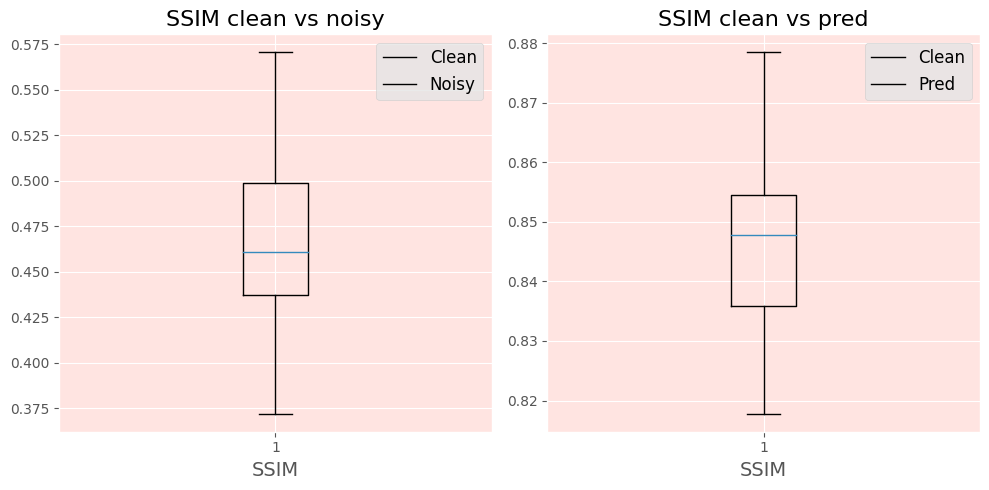

In [ ]:
# Gráficas de resultados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Colores
ax1.set_facecolor('mistyrose')
ax2.set_facecolor('mistyrose')

# Títulos
ax1.set_title('SSIM clean vs noisy', fontsize=16)
ax2.set_title('SSIM clean vs pred', fontsize=16)

# Ejes
ax1.set_xlabel('SSIM', fontsize=14)
ax2.set_xlabel('SSIM', fontsize=14)

# Boxplots
ax1.boxplot(ssim_clean_noisy, showfliers=False)
ax2.boxplot(ssim_clean_pred, showfliers=False)

# Leyendas
ax1.legend(['Clean', 'Noisy'], loc='upper right', fontsize=12)
ax2.legend(['Clean', 'Pred'], loc='upper right', fontsize=12)

# Márgenes
plt.tight_layout()

plt.show()